In [1]:
pip install pyPPG==1.0.41

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     -----

In [2]:
from pyPPG import PPG, Fiducials, Biomarkers
from pyPPG.datahandling import load_data, plot_fiducials, save_data
import pyPPG.preproc as PP
import pyPPG.fiducials as FP
import pyPPG.biomarkers as BM
import pyPPG.ppg_sqi as SQI


import numpy as np
import sys
import json
import pandas as pd

In [16]:
data_path = "bidmc_data.mat" # the path of the file containing the PPG signal to be analysed
start_sig = 0 # the first sample of the signal to be analysed
end_sig = -1 # the last sample of the signal to be analysed (here a value of '-1' indicates the last sample)
savingfolder = 'temp_dir'
savingformat = 'csv'

In [17]:
signal = load_data(data_path=data_path, start_sig=start_sig, end_sig=end_sig)
print(signal.__dict__)
#signal.v = signal.v [0:20*signal.fs] # 20 second long signal to be analysed

IndexError: invalid index to scalar variable.

In [18]:
pip install biosppy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ana.sofia.oliveira\Documents\ISEL\SB2425\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [19]:
import os
import shutil
import pandas as pd
from pathlib import Path
import numpy as np
import wfdb
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from biosppy.signals import ppg

### Creating dataset structure
- Ler records no ficheiro RECORDS.txt
- Ler records 
- Guardar todos os records num ficheiro HDF5 com fs, recordID, sinal

In [83]:
database_folder = Path('bidmc-ppg-and-respiration-dataset-1.0.0')
target_source = os.path.join(database_folder.parent.parent, 'ppg_dataset/all')

print(database_folder, target_source)

for file in os.listdir(database_folder):
    if(not os.path.isdir(file) and len(file.split('_')) == 1 ):
        filename = file.split(".")[0]
        with open(os.path.join(database_folder, file), 'w') as f:
            origin = os.path.join(database_folder, file)
            target = os.path.join(target_source, file)
            
            if(not os.path.isdir(target_source)):
                os.mkdir(target_source)
                
            shutil.copy2(origin, target)
            print("File", filename, "was copied to", target_source)
    

bidmc-ppg-and-respiration-dataset-1.0.0 .\ppg_dataset/all
File ANNOTATORS was copied to .\ppg_dataset/all
File bidmc01 was copied to .\ppg_dataset/all
File bidmc01 was copied to .\ppg_dataset/all
File bidmc01 was copied to .\ppg_dataset/all
File bidmc01n was copied to .\ppg_dataset/all
File bidmc01n was copied to .\ppg_dataset/all
File bidmc02 was copied to .\ppg_dataset/all
File bidmc02 was copied to .\ppg_dataset/all
File bidmc02 was copied to .\ppg_dataset/all
File bidmc02n was copied to .\ppg_dataset/all
File bidmc02n was copied to .\ppg_dataset/all
File bidmc03 was copied to .\ppg_dataset/all
File bidmc03 was copied to .\ppg_dataset/all
File bidmc03 was copied to .\ppg_dataset/all
File bidmc03n was copied to .\ppg_dataset/all
File bidmc03n was copied to .\ppg_dataset/all
File bidmc04 was copied to .\ppg_dataset/all
File bidmc04 was copied to .\ppg_dataset/all
File bidmc04 was copied to .\ppg_dataset/all
File bidmc04n was copied to .\ppg_dataset/all
File bidmc04n was copied to .\pp

### Reading all PPG sinals from dataset
- Ler sinais do ficheiro HDF5 

In [21]:
ppgs = None
labels = []
frequencies = []
individuos = 53

data = []

for i in range(1, individuos):
    record_name = f"ppg_dataset/all/bidmc{str(i).zfill(2)}"
    print("Record name:", record_name)
    try:
        record, fields = wfdb.rdsamp(record_name)
        print("Atributos1:", fields)
        if ('PLETH,' in fields['sig_name']):
            ppg = record[:,fields['sig_name'].index('PLETH,')][np.newaxis]
            fs = fields['fs']
            if ppgs is None: 
                data.append({'subject': i, 
                             'signal': ppg,
                             'fs': fs})
                ppgs = ppg
                labels.append(i)
                print("->Adicionado sinal do individuo", i)
                continue
            
            ppgs = np.vstack((ppgs, ppg))
            labels.append(i)
            frequencies.append(fs)
            print("->Adicionado sinal do individuo", i)
    except Exception as e:
        print("Erro ao adicionar sinal do individuo", i, e)
    

Record name: ppg_dataset/all/bidmc01
Atributos1: {'fs': 125, 'sig_len': 60001, 'n_sig': 5, 'base_date': None, 'base_time': None, 'units': ['pm', 'NU', 'mV', 'mV', 'mV'], 'sig_name': ['RESP,', 'PLETH,', 'V,', 'AVR,', 'II,'], 'comments': ['<age>: 88 <sex>: M <location>: micu <source>: https://physionet.org/physiobank/database/mimic2wdb/matched/s01182/ <data segment>: 2688-03-25-23-14<modifications>: this is not a verbatim copy of an original file. Please see the accompanying LICENSE.txt file for further details.']}
->Adicionado sinal do individuo 1
Record name: ppg_dataset/all/bidmc02
Atributos1: {'fs': 125, 'sig_len': 60001, 'n_sig': 5, 'base_date': None, 'base_time': None, 'units': ['mV', 'NU', 'pm', 'mV', 'mV'], 'sig_name': ['II,', 'PLETH,', 'RESP,', 'V,', 'AVR,'], 'comments': ['<age>: 65 <sex>: M <location>: micu <source>: https://physionet.org/physiobank/database/mimic2wdb/matched/s01241/ <data segment>: 3195-12-18-05-38<modifications>: this is not a verbatim copy of an original fil

### Sinais PPG de 3 indivíduos

- 53 registos com 8 minutos de duração por cada registo.
- Sinais PPG amostrado a 125 Hz.
- Sinais de batimento cardíaco (HR), ritmo respiratório (RR) e níveis de saturação do oxigénio no sangue (SpO2) amostrados a 1 Hz.

In [22]:
nSamples = 1
nIndividuos = 4
plt.plot(ppgs[:nIndividuos, 0:nSamples*fs].T);
plt.legend(labels[:nIndividuos]);

AttributeError: 'list' object has no attribute 'ppgs'

### Templates
- Guardar os templates de cada record no ficheiro HDF5

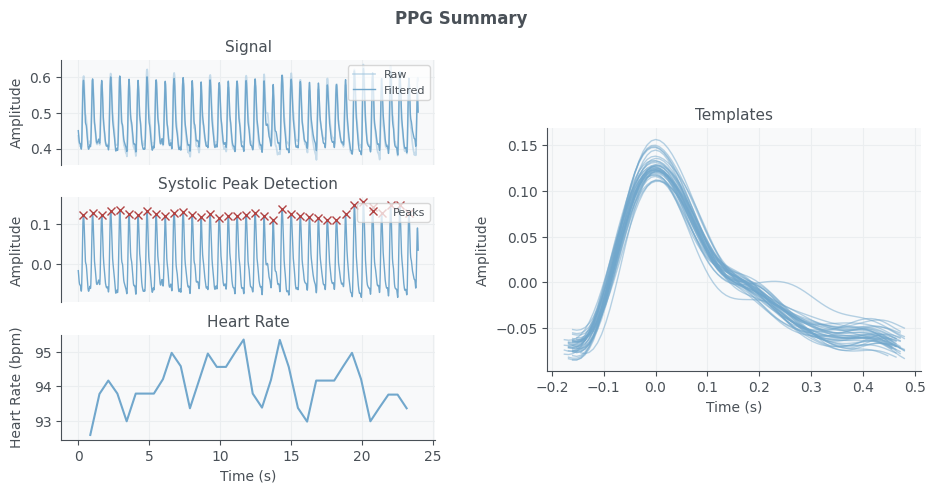

['ts', 'filtered', 'peaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


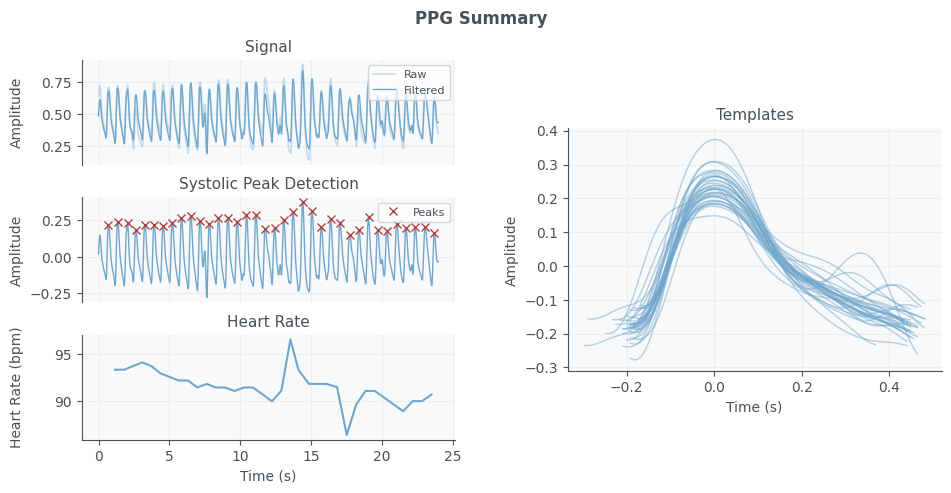

['ts', 'filtered', 'peaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


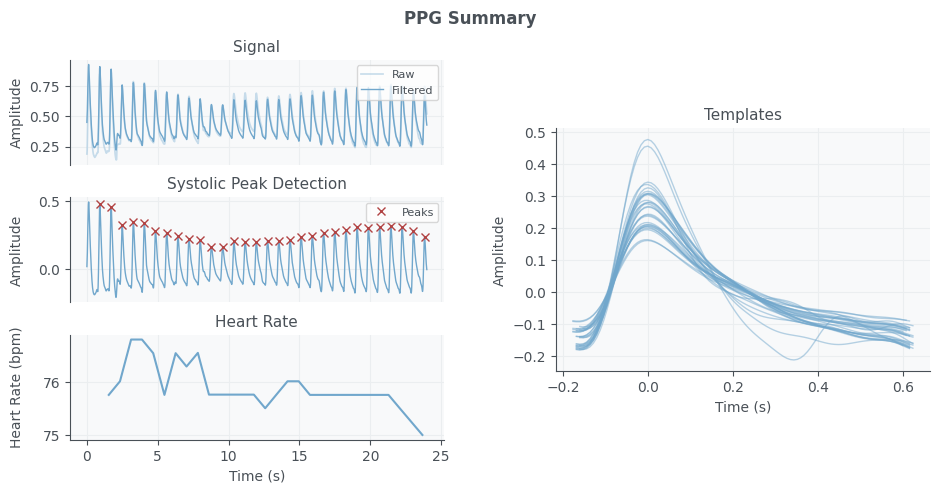

['ts', 'filtered', 'peaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


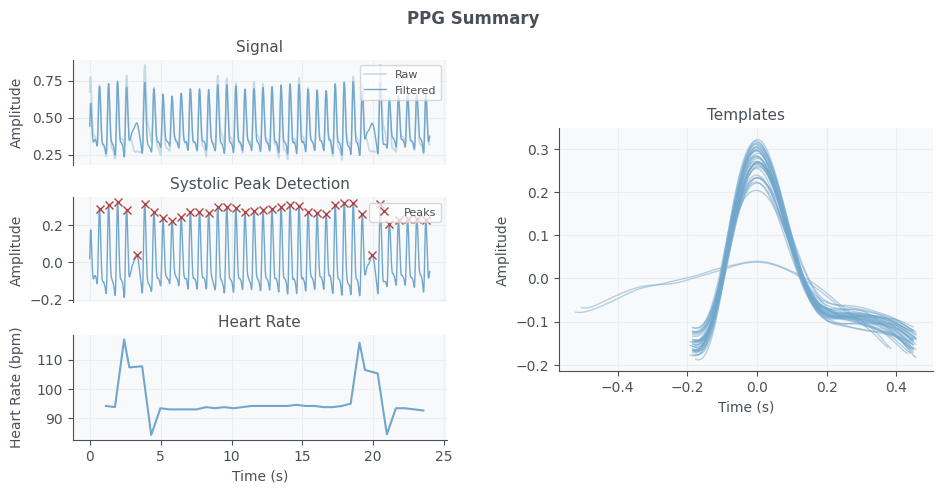

['ts', 'filtered', 'peaks', 'templates_ts', 'templates', 'heart_rate_ts', 'heart_rate']


In [19]:
templates = {'fs': fs, 'ppgs': ppgs, 'labels': labels, 'frequencies': frequencies}
for i in range(0, nIndividuos):
    out = ppg.ppg(signal=ppgs[i,:3000], sampling_rate=frequencies[i], show=True)
    print(out.keys())

In [20]:
from biosppy.clustering import mdist_templates

In [ ]:
biosppy.clustering.mdist_templates(data=None, clusters=None, ntemplates=1, metric='euclidean', metric_args=None)

- Peak detection
- IBI detection - Inter-beat Intervals
- HRV features based on IBI